https://www.kaggle.com/marklvl/bike-sharing-dataset/downloads/bike-sharing-dataset.zip/1

https://www.kaggle.com/marklvl/bike-sharing-dataset/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\users\musht\data\hour.csv",engine='python',encoding='ascii',header=0)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
#check missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [91]:
# check for outlier
#identify outlier use IQR Method
#for PTRATIO
import numpy as np

def outliers_iqr(ys):
    hold_outliers=[]
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    hold=[x for x in ys if x> upper_bound or x <lower_bound]
    #return np.where((ys > upper_bound) | (ys < lower_bound))
    return hold
out=outliers_iqr(df['cnt'])
np.array(out)

array([651, 644, 712, 676, 734, 662, 782, 749, 713, 746, 651, 686, 690,
       679, 685, 648, 721, 801, 750, 801, 729, 779, 649, 810, 801, 662,
       957, 830, 686, 657, 664, 684, 644, 658, 654, 703, 681, 729, 757,
       800, 684, 744, 759, 822, 698, 655, 643, 646, 692, 744, 704, 656,
       738, 671, 678, 678, 660, 658, 681, 712, 676, 673, 781, 775, 677,
       748, 776, 700, 819, 668, 649, 691, 654, 732, 709, 664, 702, 654,
       653, 683, 664, 681, 743, 666, 729, 813, 704, 706, 643, 769, 680,
       717, 710, 705, 732, 770, 779, 659, 678, 733, 650, 873, 846, 852,
       868, 745, 812, 669, 704, 730, 672, 645, 785, 785, 719, 692, 798,
       752, 653, 781, 710, 671, 839, 796, 693, 827, 785, 694, 668, 679,
       647, 702, 644, 684, 686, 678, 644, 662, 665, 834, 822, 645, 710,
       850, 790, 668, 724, 782, 681, 869, 813, 700, 793, 723, 651, 800,
       831, 681, 653, 713, 857, 744, 671, 719, 867, 823, 653, 823, 693,
       723, 673, 811, 795, 643, 691, 672, 646, 833, 791, 656, 90

Although 505 bike riders seem outliers based on the inter-quartile range, which constitutes 3% of total instances are not considered outlier because number of bike riders are directly proportional to weather and may be other factors;

In [7]:
# let's change the name of season instead of 1,2,3,4 - change season to SEASON

df['SEASON']=df['season'].apply(lambda x: 'spring' if x==1 else 'summer'  if  x==2 else 'fall' if x==3 else 'winter')

In [8]:
df.groupby('SEASON').count()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
SEASON,,,,,,,,,,,,,,,,,
fall,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496
spring,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242
summer,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409
winter,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232


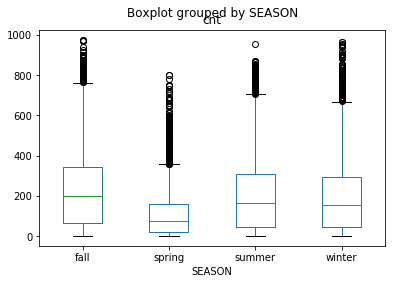

In [9]:
df.boxplot(by='SEASON', 
                       column=['cnt'], 
                       grid=False)

In [10]:
# create four separate datasets based on the four seaons
season_data=df.groupby('SEASON')
season_data.first()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
SEASON,,,,,,,,,,,,,,,,,
fall,4011,2011-06-21,3,0,6,0,0,2,1,1,0.62,0.5909,0.78,0.1642,10,23,33
spring,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
summer,1808,2011-03-21,2,0,3,0,0,1,1,3,0.34,0.3030,0.66,0.3881,2,11,13
winter,6251,2011-09-23,4,0,9,0,0,5,1,2,0.62,0.5455,0.94,0.0896,11,41,52


In [11]:
spring_data=season_data.get_group('spring')
summer_data=season_data.get_group('summer')
fall_data=season_data.get_group('fall')
winter_data=season_data.get_group('winter')


In [12]:
df.groupby('SEASON')['cnt'].mean()

SEASON
fall      236.016237
spring    111.114569
summer    208.344069
winter    198.868856
Name: cnt, dtype: float64

mean of number of bikes is highest in the fall and lowest in spring

In [13]:
# lets looks at the number of hours by the hour
hr_group=df.groupby('hr')['cnt'].sum()

In [14]:
hr_group

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64

Text(0, 0.5, 'Number of riders')

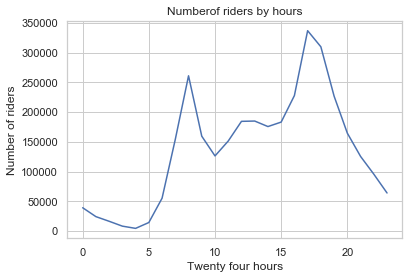

In [92]:
plt.plot(hr_group.index,hr_group)
plt.title("Numberof riders by hours")
plt.xlabel("Twenty four hours")
plt.ylabel("Number of riders")

In [16]:
# lets looks at the month of the number of bikes
mnth_group=df.groupby('mnth')['cnt'].sum()

In [17]:
mnth_group

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

Text(0, 0.5, 'Number of riders')

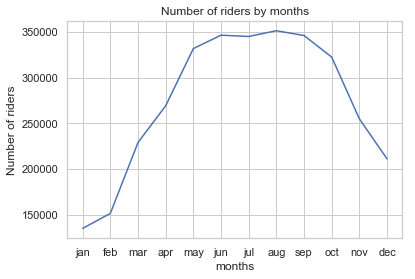

In [93]:
plt.plot(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], mnth_group)
plt.title("Number of riders by months")
plt.xlabel("months")
plt.ylabel("Number of riders")

In [19]:
# now lets look at the impact of holiday or weekend
wkday_group=df.groupby('weekday')['cnt'].sum()

In [20]:
wkday_group

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

Text(0, 0.5, 'Number of riders')

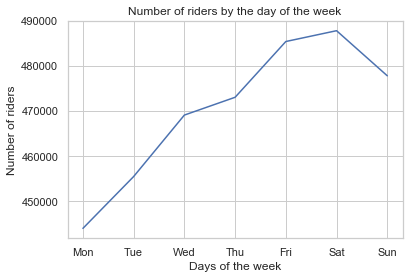

In [94]:
plt.plot(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],wkday_group)
plt.title("Number of riders by the day of the week")
plt.xlabel("Days of the week")
plt.ylabel("Number of riders")

In [22]:
# now look at weather situation
# now lets look at the impact of holiday or weekend
weather_group=df.groupby('weathersit')['cnt'].sum()


In [23]:
weather_group

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

Text(0, 0.5, 'Number of riders')

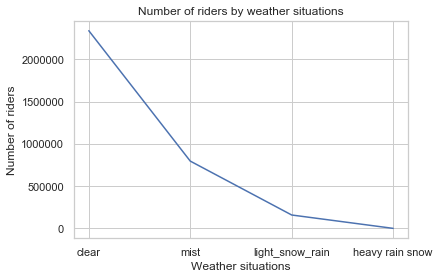

In [96]:
plt.plot(['clear','mist','light_snow_rain', 'heavy rain snow'], weather_group)
plt.title("Number of riders by weather situations")
plt.xlabel("Weather situations")
plt.ylabel("Number of riders")

In [25]:
# count casual and registered
casual_register=df[['casual','registered']].sum()

In [26]:
casual_register

casual         620017
registered    2672662
dtype: int64

In [27]:
type(casual_register)

pandas.core.series.Series

<BarContainer object of 2 artists>

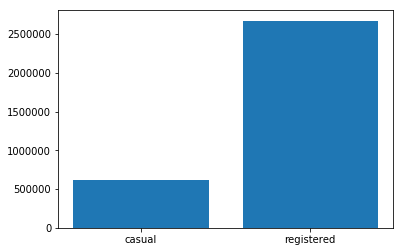

In [28]:
plt.bar(['casual','registered'],casual_register)

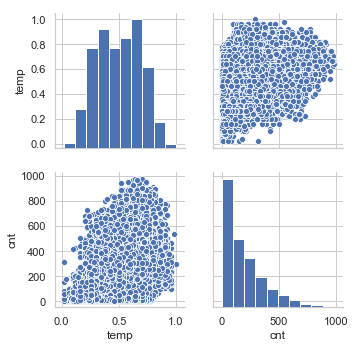

In [79]:
temp=df[['temp','cnt']]
sns.pairplot(temp,kind="scatter")

In [34]:
spring_data_hr=spring_data.groupby('hr')['cnt'].sum()
summer_data_hr=summer_data.groupby('hr')['cnt'].sum()
fall_data_hr=fall_data.groupby('hr')['cnt'].sum()
winter_data_hr=winter_data.groupby('hr')['cnt'].sum()

In [35]:
all_data_hr=pd.DataFrame(list(zip(spring_data_hr,summer_data_hr,fall_data_hr,winter_data_hr)),columns=['Spring','Summer','Fall','Winter'])

In [36]:
all_data_hr

,Spring,Summer,Fall,Winter
0,4878,10459,13822,9971
1,3229,6481,8132,6322
2,2175,4302,5716,4159
3,1108,2084,2930,2052
4,490,1118,1541,1279
5,1830,3508,4947,3976
6,7261,14549,18946,14376
7,20655,40753,52000,40763
8,42095,69945,79204,69757
9,26316,43053,47927,42142


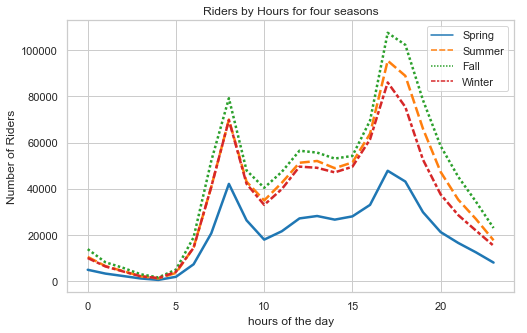

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
plt.title('Riders by Hours for four seasons')
plt.xlabel('hours of the day')
plt.ylabel('Number of Riders')
#g=sns.lineplot(data=all_data_hr, palette="tab10", linewidth=2.5)
sns.lineplot(data=all_data_hr, palette="tab10", linewidth=2.5)



In [38]:
spring_data_mnth=spring_data.groupby('mnth')['cnt'].sum()
summer_data_mnth=summer_data.groupby('mnth')['cnt'].sum()
fall_data_mnth=fall_data.groupby('mnth')['cnt'].sum()
winter_data_mnth=winter_data.groupby('mnth')['cnt'].sum()

In [45]:
# now compare years and seasons
year_2011=df[df['yr']==0]
year_2012=df[df['yr']==1]
print (year_2011.shape, year_2012.shape)

(8645, 18) (8734, 18)


In [46]:
year11_gr_season=year_2011.groupby('SEASON')['cnt'].sum()
year11_gr_season

SEASON
fall      419650
spring    150000
summer    347316
winter    326137
Name: cnt, dtype: int64

In [47]:
year12_gr_season=year_2012.groupby('SEASON')['cnt'].sum()
year12_gr_season

SEASON
fall      641479
spring    321348
summer    571273
winter    515476
Name: cnt, dtype: int64

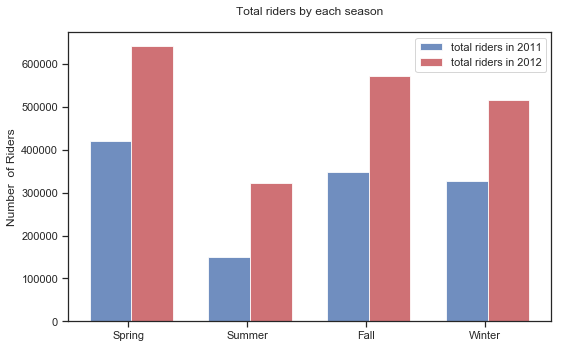

In [73]:
# create plot
import matplotlib as mpl
index = np.arange(4)
#fig, ax = plt.subplots()
plt.figure(figsize=(8,5))
#index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

fake=['A','B','C','D']
first = plt.bar(fake, year11_gr_season, bar_width,
alpha=opacity,
color='b',
label='total riders in 2011')

second = plt.bar(index + bar_width, year12_gr_season, bar_width, alpha=opacity,color='r',label='total riders in 2012')
#plt.xlabel('\nBlue indicates total population for each group and \nred indicates the number of individuals holding stocks from that group\n')
plt.ylabel('Number  of Riders')
plt.title('Total riders by each season\n')
plt.xticks(index + bar_width-.2, ('Spring','Summer','Fall','Winter'))
plt.legend()
plt.tight_layout()

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [49]:
tt=year_2011[['casual','registered']].sum()
tt

casual        247252
registered    995851
dtype: int64

In [50]:
tt=year_2012[['casual','registered']].sum()
tt

casual         372765
registered    1676811
dtype: int64

In [51]:
casual_increase=100*(372765-247252)/247252
casual_increase

50.763188973193344

In [52]:
registered_increase=100*(1676811-995851)/1676811
registered_increase

40.610420613891485

In [53]:
actual_casual_increase=372765-247252
actual_casual_increase

125513

In [54]:
actual_registered_increase=1676811-995851
actual_registered_increase

680960

In [55]:
list1=[372765,1676811]
list2=[247252,995851]
list3=[125513,680960]

In [56]:

list1=[247252,995851]
list2=[372765,1676811]
list3=[125513,680960]

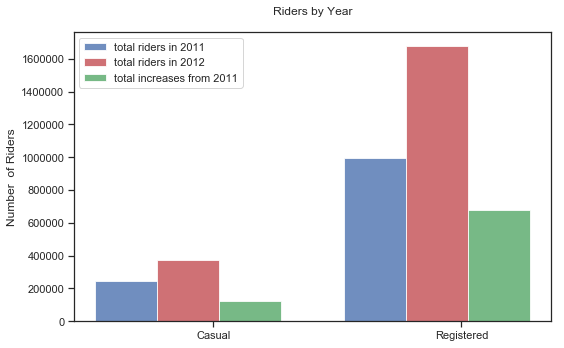

In [70]:
# create plot
import matplotlib as mpl
index = np.arange(2)
#fig, ax = plt.subplots()
plt.figure(figsize=(8,5))
#index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

fake=['A','B']
first = plt.bar(fake, list1, bar_width,
alpha=opacity,
color='b',
label='total riders in 2011')

second = plt.bar(index + bar_width, list2, bar_width, alpha=opacity,color='r',label='total riders in 2012')

third = plt.bar(index + bar_width+bar_width, list3, bar_width, alpha=opacity,color='g',label='total increases from 2011')

#plt.xlabel('\nBlue indicates total riders and \nred indicates the number of individuals holding stocks from that group\n')
#plt.xlabel('\nBlue indicates total riders and \nred indicates the number of individuals holding stocks from that group\n')
plt.ylabel('Number  of Riders')
plt.title('Riders by Year\n')
plt.xticks(index + bar_width+.1, ('Casual','Registered'))
plt.legend()
plt.tight_layout()

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [58]:
# see number of riders by temperature situations - clear, mist, light, heavey
df_weather=df.groupby('weathersit')['cnt'].sum()

Text(0, 0.5, 'Number of riders')

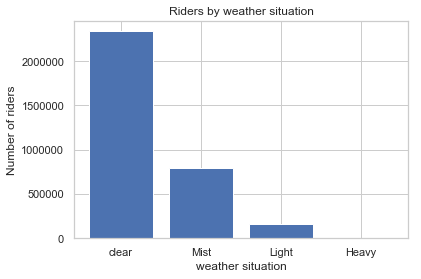

In [99]:
plt.bar(['clear','Mist','Light','Heavy'],df_weather)
plt.title("Riders by weather situation")
plt.xlabel("weather situation")
plt.ylabel("Number of riders")

# statistical analysis
1. test means of total riders by year - check for normality and/or perform log transformation
2. test for means of casul riders and registered riders - check for normality and/or perform log transformation


# check means of total riders by year

(array([ 109.,  262.,  412.,  544.,  573.,  776., 1253., 1946., 1872.,
         898.]),
 array([0.        , 0.64785096, 1.29570193, 1.94355289, 2.59140386,
        3.23925482, 3.88710579, 4.53495675, 5.18280771, 5.83065868,
        6.47850964]),
 <a list of 10 Patch objects>)

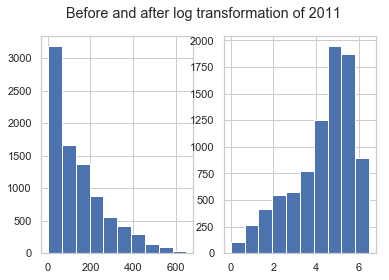

In [85]:
# look at the data before and after log transformation
fig, axs = plt.subplots(1,2)
fig.suptitle('Before and after log transformation of 2011')
axs[0].hist(year_2011['cnt'])
axs[1].hist(np.log(year_2011['cnt']))

(array([  49.,  170.,  402.,  505.,  537.,  675.,  977., 1944., 2289.,
        1186.]),
 array([0.        , 0.68844867, 1.37689733, 2.065346  , 2.75379466,
        3.44224333, 4.13069199, 4.81914066, 5.50758932, 6.19603799,
        6.88448665]),
 <a list of 10 Patch objects>)

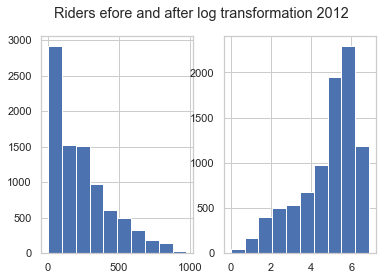

In [86]:
# look at the data before and after log transformation
fig, axs = plt.subplots(1,2)
fig.suptitle('Riders efore and after log transformation 2012 ')
axs[0].hist(year_2012['cnt'])
axs[1].hist(np.log(year_2012['cnt']))

In [82]:
# perform a test now
from scipy import stats
t2, p2 = stats.ttest_ind(np.log(year_2011['cnt']),np.log(year_2012['cnt']))
print("t = " + str(t2))
print("p = " + str(p2))


t = -22.160400484938148
p = 2.5301602945983702e-107


In [83]:
# perform a test now
from scipy import stats
t2, p2 = stats.ttest_ind(df['casual'],df['registered'])
print("t = " + str(t2))
print("p = " + str(p2))



t = -97.81332643791566
p = 0.0


now test any significant differene between casual and register riders